### Decision Tree Regression Task

##### 기온 및 강수량 별 모기 비율 예측

- date: 년-월-일
- mosquito_Indicator: 모기 비율
- rain(mm): 일 강수량
- mean_T(℃): 일 평균 기온
- min_T(℃): 일 최저 기온
- max_T(℃): 일 최고 기온

In [16]:
import pandas as pd

mos_df = pd.read_csv('./datasets/korea_mosquito.csv')
mos_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1337,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1338,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1339,2019-12-29,5.5,1.4,3.8,1.1,6.2
1340,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [17]:
mos_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1342.0,251.991803,295.871336,0.0,5.5,91.9,480.400,1000.0
rain(mm),1342.0,3.539866,13.868106,0.0,0.0,0.0,0.400,144.5
mean_T(℃),1342.0,14.166021,10.943990,-14.8,4.5,16.5,23.300,33.7
min_T(℃),1342.0,10.005663,11.109489,-17.8,0.3,11.5,19.500,30.3
max_T(℃),1342.0,19.096870,11.063394,-10.7,9.3,21.9,28.175,39.6


In [18]:
mos_df.isna().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [19]:
mos_df.duplicated().sum()

47

In [20]:
mos_df = mos_df.drop_duplicates()
mos_df = mos_df.reset_index(drop=True)
mos_df

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...,...
1290,2019-12-27,5.5,0.0,-1.7,-4.6,2.6
1291,2019-12-28,5.5,0.0,1.1,-3.6,6.1
1292,2019-12-29,5.5,1.4,3.8,1.1,6.2
1293,2019-12-30,5.5,0.4,2.7,-5.7,6.8


In [21]:
mos_df = mos_df.drop(columns='date', axis=1)
mos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mosquito_Indicator  1295 non-null   float64
 1   rain(mm)            1295 non-null   float64
 2   mean_T(℃)           1295 non-null   float64
 3   min_T(℃)            1295 non-null   float64
 4   max_T(℃)            1295 non-null   float64
dtypes: float64(5)
memory usage: 50.7 KB


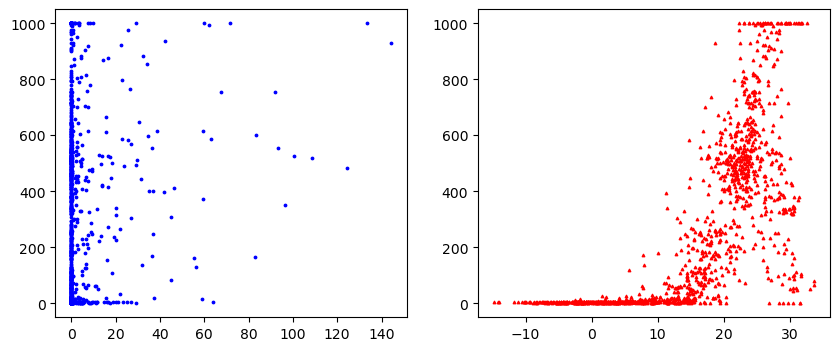

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x='rain(mm)', y='mosquito_Indicator', data=mos_df, c='blue', s=3)
ax[1].scatter(x='mean_T(℃)', y='mosquito_Indicator', data=mos_df, c='red', marker='^', s=3)
plt.show()

<Axes: >

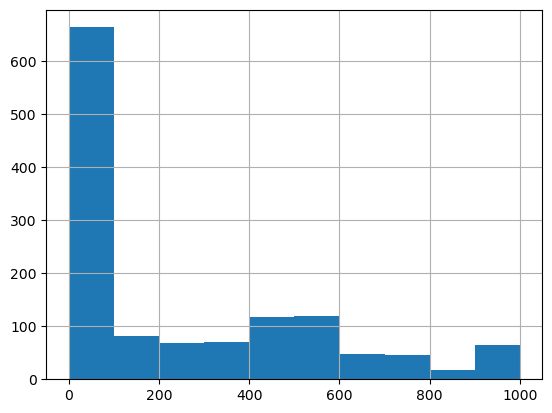

In [23]:
mos_df.mosquito_Indicator.hist()

In [24]:
from sklearn.preprocessing import StandardScaler

mos_df['scale_target'] = StandardScaler().fit_transform(mos_df[['mosquito_Indicator']])
mos_df[~mos_df.scale_target.between(-1.96, 1.96)].shape[0]

74

In [27]:
mos_df = mos_df[mos_df.scale_target.between(-1.96, 1.96)].reset_index(drop=True)
mos_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃),scale_target
0,254.4,0.0,18.8,12.2,26.0,0.018395
1,273.5,16.5,21.1,16.5,28.4,0.083195
2,304.0,27.0,12.9,8.9,17.6,0.186671
3,256.2,0.0,15.7,10.2,20.6,0.024502
4,243.8,7.5,18.9,10.2,26.9,-0.017567
...,...,...,...,...,...,...
1216,5.5,0.0,-1.7,-4.6,2.6,-0.826038
1217,5.5,0.0,1.1,-3.6,6.1,-0.826038
1218,5.5,1.4,3.8,1.1,6.2,-0.826038
1219,5.5,0.4,2.7,-5.7,6.8,-0.826038


In [28]:
mos_df = mos_df.drop(columns='scale_target', axis=1)
mos_df

,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,254.4,0.0,18.8,12.2,26.0
1,273.5,16.5,21.1,16.5,28.4
2,304.0,27.0,12.9,8.9,17.6
3,256.2,0.0,15.7,10.2,20.6
4,243.8,7.5,18.9,10.2,26.9
...,...,...,...,...,...
1216,5.5,0.0,-1.7,-4.6,2.6
1217,5.5,0.0,1.1,-3.6,6.1
1218,5.5,1.4,3.8,1.1,6.2
1219,5.5,0.4,2.7,-5.7,6.8


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def get_evaluation(y_test, prediction):
    MAE =  mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)

    print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'.format(MAE, MSE, RMSE, MSLE, RMSLE, R2))

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

features, targets = mos_df.iloc[:, 1:], mos_df.mosquito_Indicator

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=124)

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

y_train = np.log1p(y_train)

dt_reg = DecisionTreeRegressor(random_state=124, max_depth=4)
rf_reg = RandomForestRegressor(random_state=124, n_estimators=3000, max_depth=8)
gb_reg = GradientBoostingRegressor(random_state=124, n_estimators=3000, max_depth=8)
xgb_reg = XGBRegressor(n_estimators=3000, max_depth=8)
lgb_reg = LGBMRegressor(n_estimators=3000, max_depth=8)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(np.log1p(y_test), prediction)

DecisionTreeRegressor
MAE: 0.5566, MSE: 0.8028, RMSE: 0.8960, MSLE: 0.0672, RMSLE: 0.2593, R2: 0.8204
RandomForestRegressor
MAE: 0.5567, MSE: 0.7894, RMSE: 0.8885, MSLE: 0.0661, RMSLE: 0.2572, R2: 0.8234
GradientBoostingRegressor
MAE: 0.6792, MSE: 1.1798, RMSE: 1.0862, MSLE: 0.0908, RMSLE: 0.3014, R2: 0.7361
XGBRegressor
MAE: 0.6479, MSE: 1.0123, RMSE: 1.0062, MSLE: 0.0825, RMSLE: 0.2873, R2: 0.7735
LGBMRegressor
MAE: 0.7649, MSE: 1.3302, RMSE: 1.1533, MSLE: 0.0985, RMSLE: 0.3138, R2: 0.7024
